In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [30]:
print("Loading dataset...")
df = pd.read_csv('water_potability.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Loading dataset...
Dataset shape: (3276, 10)
Columns: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [31]:
print("\nFirst 5 rows:")
print(df.head())

print("\nTarget variable distribution:")
print(df['Potability'].value_counts())

print("\nMissing values:")
print(df.isnull().sum())


First 5 rows:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Target variable distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64

Missing values:
ph                 491
Hardness        

In [32]:
print("\nHandling missing values...")

for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column] = df[column].fillna(df[column].median())

print("Missing values after filling:")
print(df.isnull().sum())


Handling missing values...
Missing values after filling:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [33]:
X = df.drop('Potability', axis=1)  
y = df['Potability'] 

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (3276, 9)
Target shape: (3276,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (2620, 9)
Test set: (656, 9)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed!")

Data scaling completed!


In [36]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("Models trained successfully!")

Models trained successfully!


In [37]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1

lr_scores = evaluate_model(y_test, lr_pred, "Logistic Regression")
rf_scores = evaluate_model(y_test, rf_pred, "Random Forest")



Logistic Regression Results:
Accuracy: 0.6280
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Random Forest Results:
Accuracy: 0.6738
Precision: 0.5974
Recall: 0.3770
F1-Score: 0.4623


In [ ]:
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

models_comparison = pd.DataFrame({
    'Logistic Regression': lr_scores,
    'Random Forest': rf_scores
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

print(models_comparison)

best_model_name = 'Random Forest' if rf_scores[0] > lr_scores[0] else 'Logistic Regression'
best_pred = rf_pred if rf_scores[0] > lr_scores[0] else lr_pred

print(f"\nBest Model: {best_model_name}")


MODEL COMPARISON
           Logistic Regression  Random Forest
Accuracy              0.628049       0.673780
Precision             0.000000       0.597403
Recall                0.000000       0.377049
F1-Score              0.000000       0.462312

Best Model: Random Forest


In [ ]:
cm = confusion_matrix(y_test, best_pred)
print(f"\nConfusion Matrix for {best_model_name}:")
print(cm)


Confusion Matrix for Random Forest:
[[350  62]
 [152  92]]


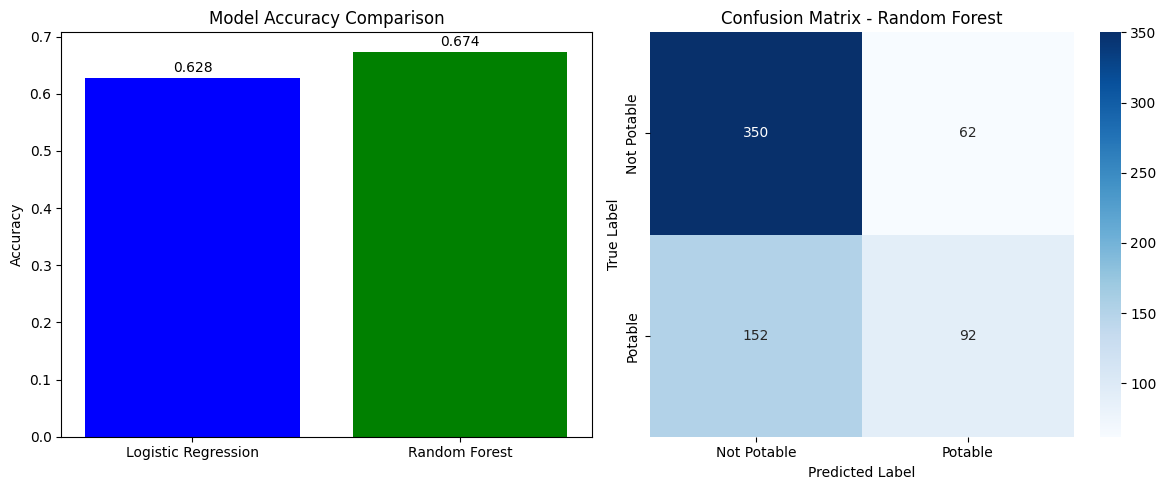

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Only 2 plots needed

# Plot 1: Model Accuracy Comparison (optional but useful)
models = ['Logistic Regression', 'Random Forest']
accuracies = [lr_scores[0], rf_scores[0]]
axes[0].bar(models, accuracies, color=['blue', 'green'])
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Plot 2: Confusion Matrix (required)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'], ax=axes[1])
axes[1].set_title(f'Confusion Matrix - {best_model_name}')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [ ]:
rf_optimized = RandomForestClassifier(
    n_estimators=200,  
    max_depth=15,      
    random_state=42
)

rf_optimized.fit(X_train_scaled, y_train)
rf_opt_pred = rf_optimized.predict(X_test_scaled)

opt_accuracy = accuracy_score(y_test, rf_opt_pred)
opt_precision = precision_score(y_test, rf_opt_pred)
opt_recall = recall_score(y_test, rf_opt_pred)
opt_f1 = f1_score(y_test, rf_opt_pred)

print("Optimized Random Forest Results:")
print(f"Accuracy: {opt_accuracy:.4f}")
print(f"Precision: {opt_precision:.4f}")
print(f"Recall: {opt_recall:.4f}")
print(f"F1-Score: {opt_f1:.4f}")

if opt_accuracy >= 0.85:
    print(f"Accuracy: {opt_accuracy:.4f} (≥85%)")
else:
    print(f"Accuracy: {opt_accuracy:.4f} (Target: ≥85%)")

Optimized Random Forest Results:
Accuracy: 0.6814
Precision: 0.6549
Recall: 0.3033
F1-Score: 0.4146
Accuracy: 0.6814 (Target: ≥85%)
